# Anomaly Detection

## Import required modules

In [627]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima
import warnings
warnings.simplefilter("ignore")

## Task 1: Familiarization Task

In [3]:
data = pd.read_csv("dataset/BATADAL_dataset03.csv", index_col="DATETIME")
data.index = pd.to_datetime(data.index)
data

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
2014-06-01 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392,0
2014-06-01 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869,0
2014-06-01 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341,0
2014-06-01 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440,0


In [4]:
data.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

We can see that there are several kinds of signal readings provided in the SCADA data. The description of each signal is provided in https://batadal.net/images/rules.pdf. Basically the types of signal are:

* L_T1 - L_T7: depicts the water level of Tank 1 to 7
* F_PU1 - F_PU11: depicts the flow through Pump 1 - Pump 11
* S_PU1 - S_PU11: depicts the status of Pump 1 - Pump 11 with value 0 (OFF) or 1 (ON)
* F_V2: depicts the flow through Valve 2
* S_V2: depicts the status of Valve 2 with value 0 (CLOSED) or 1 (OPEN)
* P_JXXX: depicts the suction and discharge pressure of a pumping station which the junction is located

In [5]:
start_time = 0 # the start time
time_span = 160 # how much time to plot

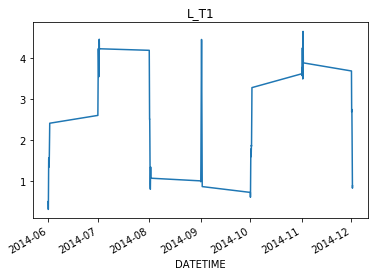

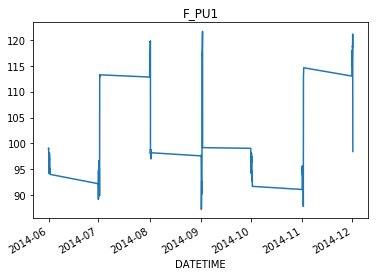

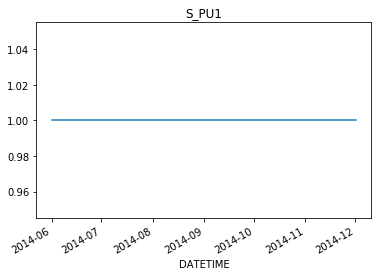

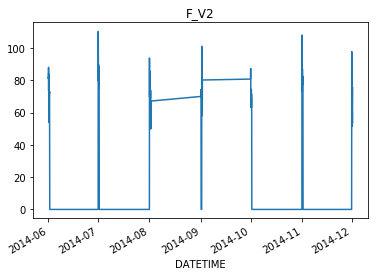

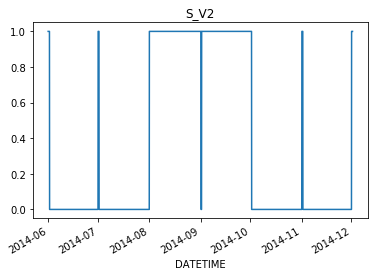

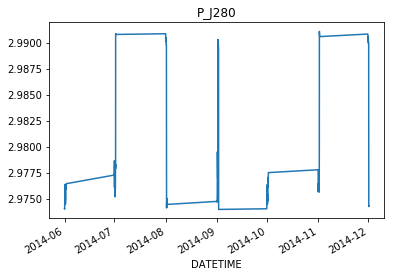

In [6]:
for signal in ["L_T1", "F_PU1", "S_PU1", "F_V2", "S_V2", "P_J280"]:
    plt.figure()
    data[signal][start_time:start_time+time_span].plot()
    plt.title(signal)

### Correlation

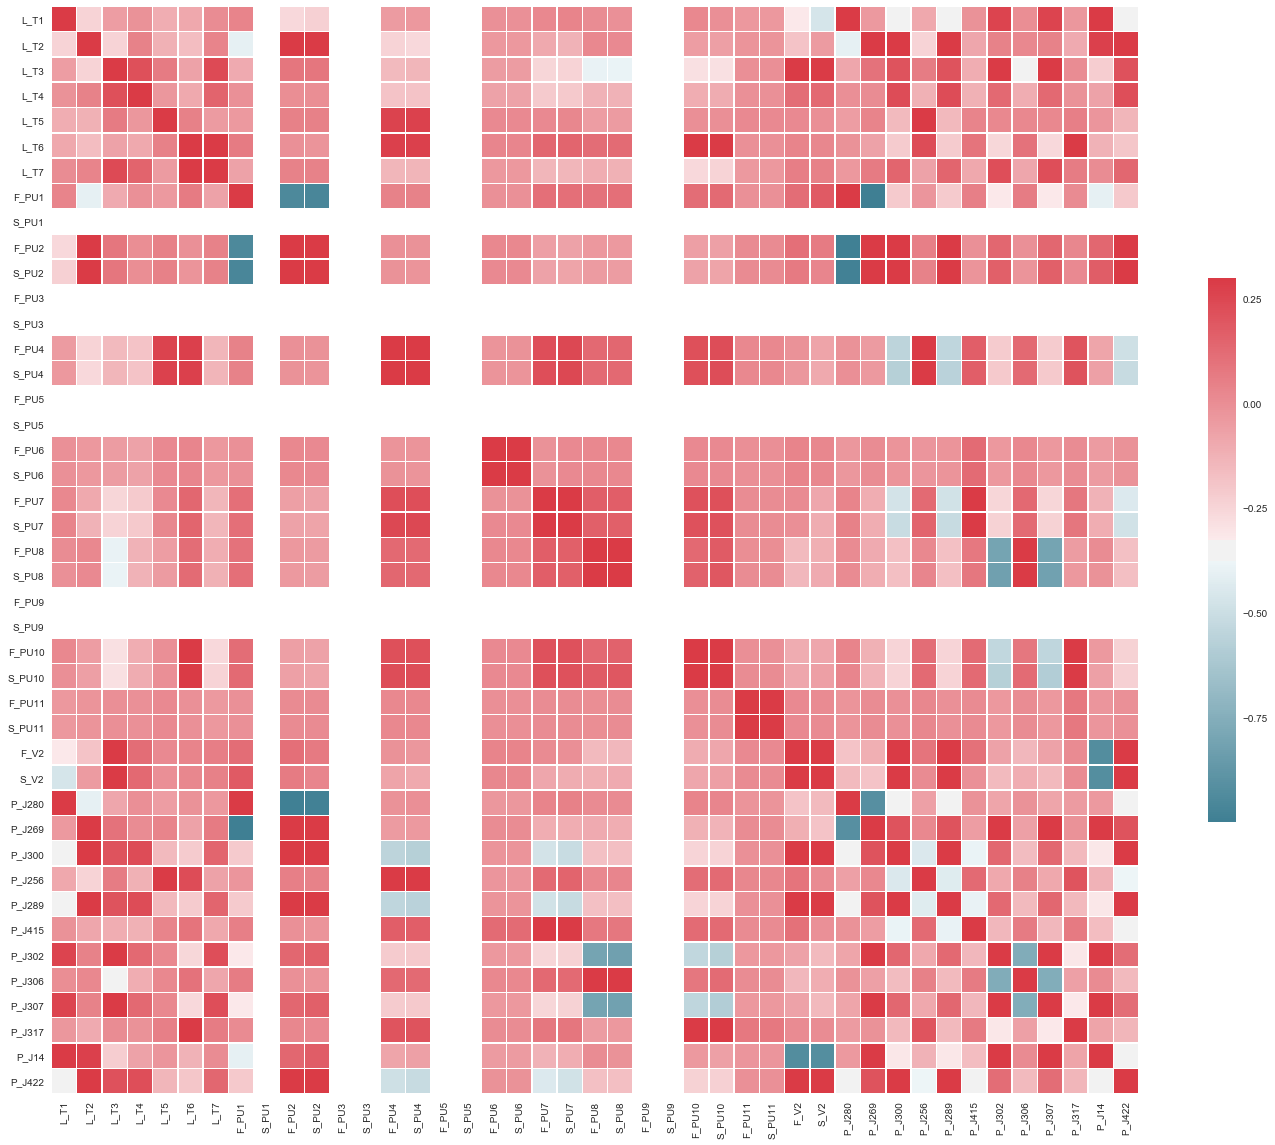

In [7]:
temp = data.drop("ATT_FLAG",axis=1,inplace=False)

sns.set(style="white")
# Compute the correlation matrix
corr = temp.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(corr, cmap=cmap, vmax=0.3,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

### Prediction Model using Autoregression

#### Autocorrelation plot

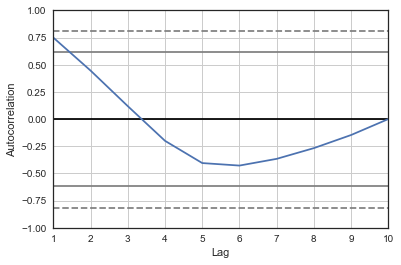

In [76]:
autocorrelation_plot(data['L_T2'][:10])

Lag: 37
Coefficients: [ 4.28791538e-01  1.71433160e+00 -9.30773460e-01  2.67341076e-01
 -7.14957657e-02 -1.02241316e-01  3.33309274e-02 -4.50823472e-02
  8.75216892e-05  9.29861388e-02 -4.41530823e-02  2.49594128e-02
 -5.53992100e-03 -7.19882517e-02 -4.72564474e-02  7.56041309e-02
  8.43370057e-03  1.07379747e-02 -5.04435942e-02  7.00790522e-03
  1.01333927e-02 -3.45236499e-02  1.03691217e-01  1.13538254e-03
  1.16663433e-02 -8.64861508e-02 -1.85555396e-02 -4.50382295e-02
  3.95669070e-02  1.26009175e-02  3.90865436e-02  1.78719887e-02
 -2.77130893e-02 -3.66664831e-02  3.48586185e-03  4.70029237e-02
  3.75131407e-02 -7.12803451e-02]
predicted=1.073243, expected=0.869968
predicted=0.684354, expected=0.663842
predicted=0.599365, expected=1.031355
predicted=0.822821, expected=1.591397
predicted=1.265122, expected=2.480027
predicted=1.811987, expected=3.203121
predicted=2.353368, expected=3.657291
predicted=2.839373, expected=4.082142
predicted=3.226049, expected=4.450097
predicted=3.48889

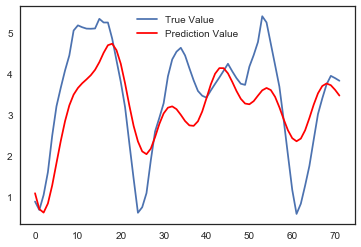

In [9]:
# split dataset
series = data['L_T2']
X = series.values
train, test = X[1:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test, label="True Value")
plt.plot(predictions, color='red',label="Prediction Value")
plt.legend()
plt.show()

## Task 2: ARMA Task

/usr/local/lib/python3.6/site-packages/pandas/plotting/_misc.py:629: RuntimeWarning: invalid value encountered in double_scalars
  (data[h:] - mean)).sum() / float(n) / c0
/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


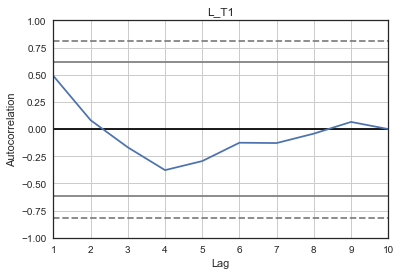

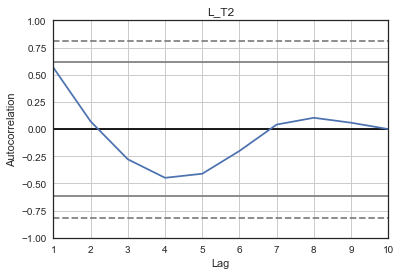

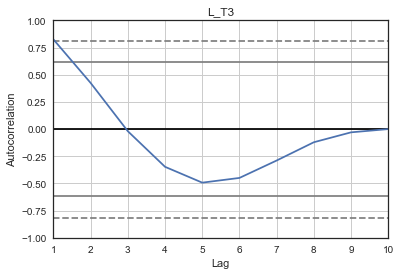

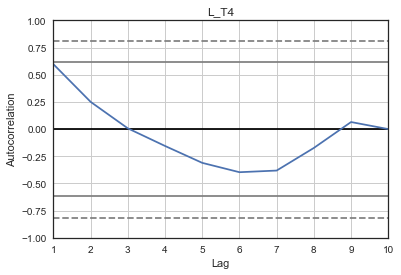

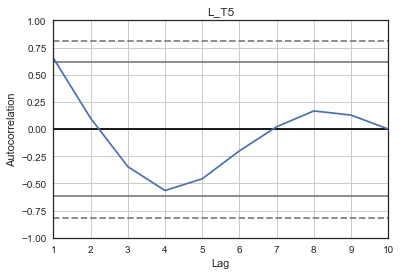

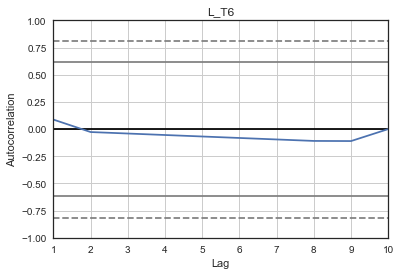

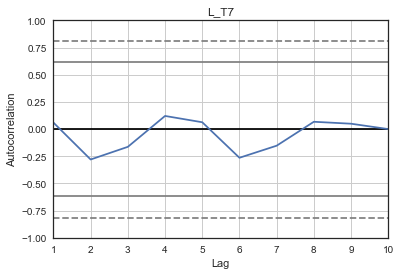

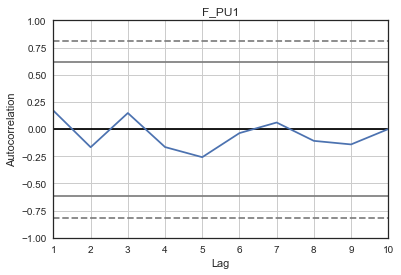

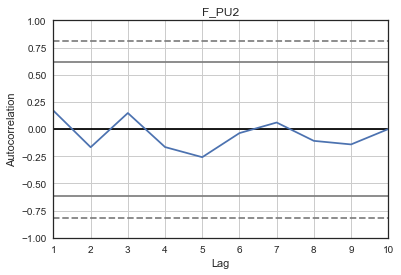

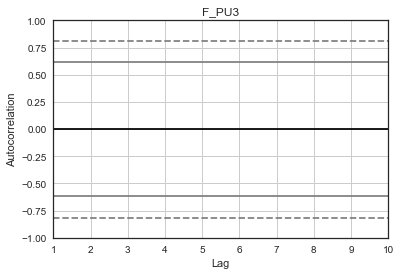

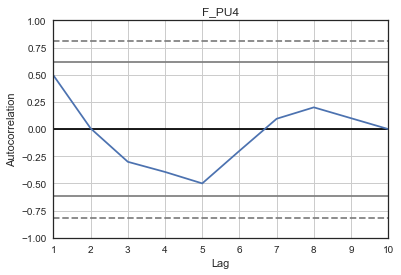

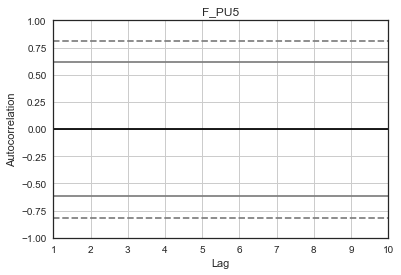

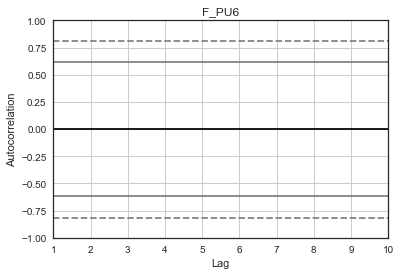

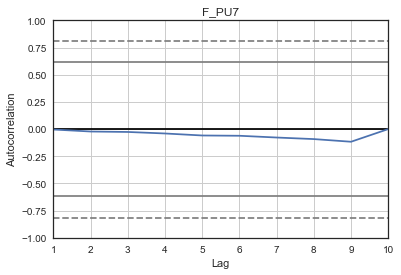

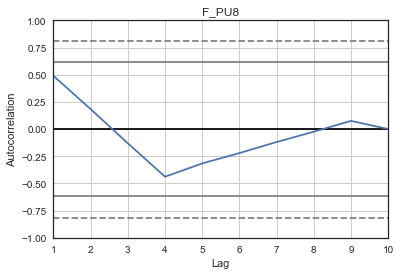

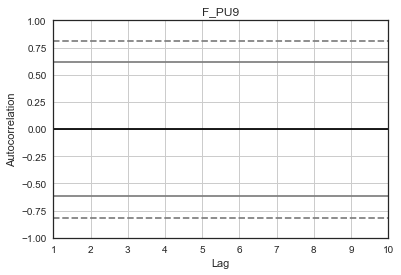

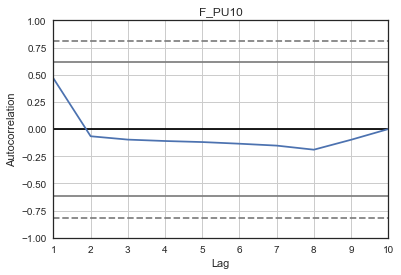

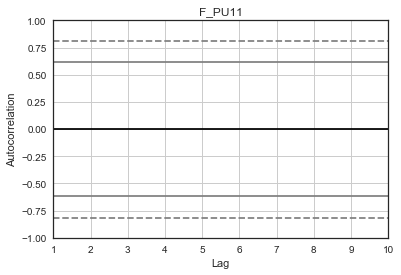

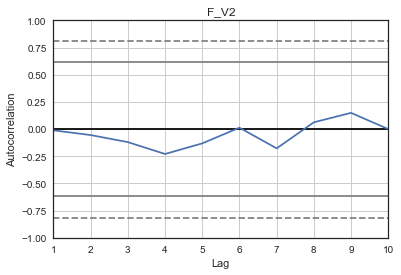

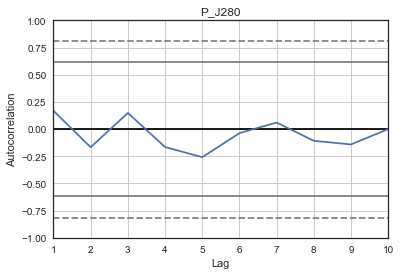

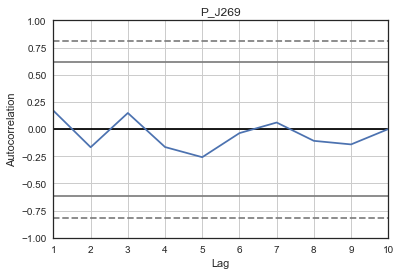

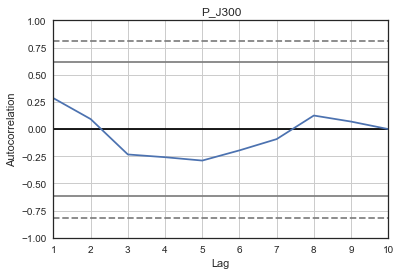

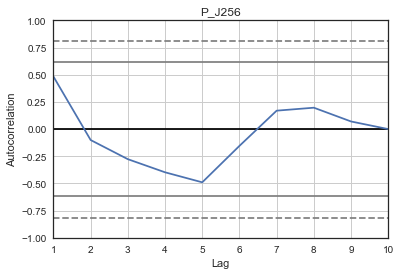

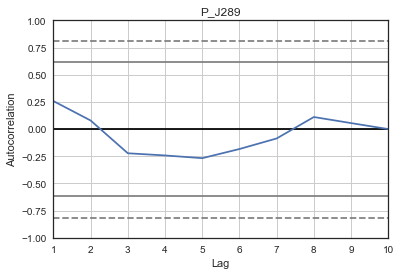

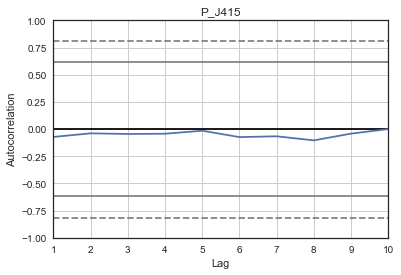

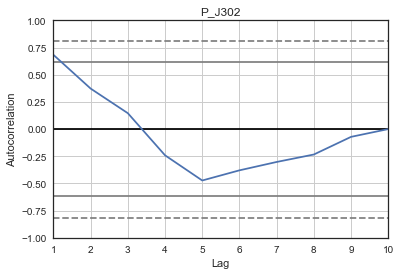

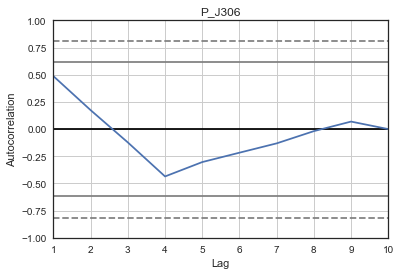

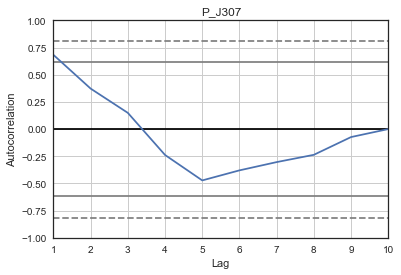

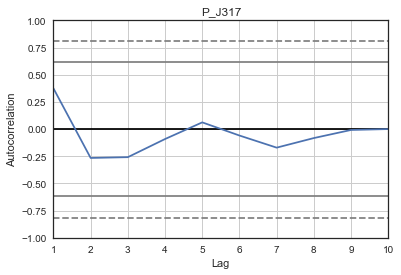

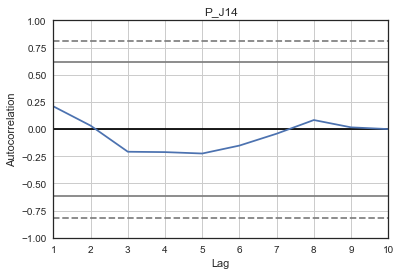

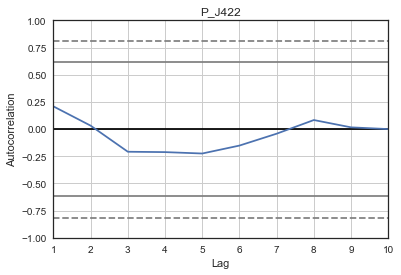

In [249]:
# list the sensors column
sensors = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7', 'F_PU8', 'F_PU9', 'F_PU10', 'F_PU11', 'F_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

# autocorrelation for each sensor
for sensor in sensors:
    plt.figure()
    autocorrelation_plot(data[sensor][10:20])
    plt.title(sensor)


We can see from the autocorrelation plot, that a good starting lag number (for the order of AR) would be either 1, 2, or 3. We will use the auto_arima function to grid-search the best parameter for p and q using AIC as the criterion. Let's try it first on `L_T1`. Note that we use d=1 (differencing order) to make sure that the series is stationary and speeds up the grid search.

In [550]:
stepwise_model = auto_arima(data['L_T1'], start_p=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,
                           d=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 0, 1); AIC=-7752.456, BIC=-7724.143, Fit time=3.270 seconds
Fit ARIMA: order=(0, 0, 0); AIC=28103.160, BIC=28117.316, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-558.100, BIC=-536.866, Fit time=0.082 seconds
Fit ARIMA: order=(0, 0, 1); AIC=16531.825, BIC=16553.059, Fit time=1.045 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-13266.336, BIC=-13230.946, Fit time=9.369 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-13038.324, BIC=-13010.011, Fit time=1.464 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-13286.692, BIC=-13244.224, Fit time=5.715 seconds
Fit ARIMA: order=(3, 0, 3); AIC=-13411.243, BIC=-13354.618, Fit time=9.412 seconds
Fit ARIMA: order=(2, 0, 3); AIC=-13301.274, BIC=-13251.727, Fit time=8.654 seconds
Fit ARIMA: order=(3, 0, 2); AIC=-13412.405, BIC=-13362.859, Fit time=11.252 seconds
Fit ARIMA: order=(3, 0, 1); AIC=-13277.969, BIC=-13235.500, Fit time=6.192 seconds
Total fit time: 56.505 seconds


In [551]:
stepwise_model
arma_order = (stepwise_model.order[0],stepwise_model.order[2])

Okay, so we found the model with smalles AIC number with p=3 and q=2. Let's fit the model and plot the residual

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


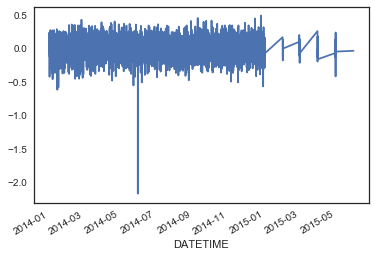

In [555]:
model_fit = ARMA(data['L_T1'], order=(arma_order)).fit()
residualsTraining = model_fit.resid
residualsTraining.plot()

In [ ]:
# adjusting threshold based on training set
def adjust_threshold(residuals, percentile):
    threshold = np.percentile(abs(residuals),percentile)
    return threshold

In [566]:
# let's set threshold to 90% percentile
threshold = adjust_threshold(residualsTraining, 90)

0.22952767290566875

Okay, so we can see that the absolute maximum of the residual error is 2. So later we may use it to consider the threshold for anomaly detection. Now let's try to do rolling forecast on the test data

In [440]:
test_data = pd.read_csv("dataset/BATADAL_dataset04.csv", index_col="DATETIME")
test_data.index = pd.to_datetime(test_data.index)
test_data.sort_index(inplace=True)
test_data.columns = [x.strip() for x in test_data.columns]
test_data.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [441]:
print(test_data['L_T1'].describe())
print(data['L_T1'].describe())

count    4177.000000
mean        2.707446
std         1.209627
min         0.320000
25%         1.650000
50%         2.820000
75%         3.780000
max         5.730000
Name: L_T1, dtype: float64
count    8761.000000
mean        2.676905
std         1.202940
min         0.320112
25%         1.650647
50%         2.798855
75%         3.754744
max         4.871329
Name: L_T1, dtype: float64


In [442]:
# for manual prediction
def arma_predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

In [449]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model = ARMA(data['L_T1'], order=arma_order)
    model_fit = model.fit(disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid

    predictions = list()
    start = max(arma_order)
    resid = [0] * start
    predictions = [0] * start
    for t in range(start,len(test_data['L_T1'])):
        print("t=",t)
        history = test_data['L_T1'][:t]
        yhat = arma_predict(ar_coef, history) + arma_predict(ma_coef, resid)
        predictions.append(yhat)
        expected = test_data['L_T1'][t]
        resid.append(expected - yhat)
        print('>predicted=%.3f, expected=%.3f' % (yhat, expected))
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

t= 3
>predicted=3.044, expected=2.980
t= 4
>predicted=3.097, expected=3.020
t= 5
>predicted=3.083, expected=3.110
t= 6
>predicted=3.221, expected=3.190
t= 7
>predicted=3.266, expected=3.440
t= 8
>predicted=3.675, expected=3.790
t= 9
>predicted=4.065, expected=4.130
t= 10
>predicted=4.364, expected=4.410
t= 11
>predicted=4.573, expected=4.420
t= 12
>predicted=4.318, expected=4.280
t= 13
>predicted=4.083, expected=4.090
t= 14
>predicted=3.861, expected=3.970
t= 15
>predicted=3.811, expected=3.820
t= 16
>predicted=3.610, expected=3.570
t= 17
>predicted=3.271, expected=3.310
t= 18
>predicted=3.022, expected=3.070
t= 19
>predicted=2.799, expected=2.770
t= 20
>predicted=2.438, expected=2.410
t= 21
>predicted=2.038, expected=1.950
t= 22
>predicted=1.498, expected=1.520
t= 23
>predicted=1.126, expected=1.110
t= 24
>predicted=0.733, expected=1.030
t= 25
>predicted=0.978, expected=0.980
t= 26
>predicted=0.882, expected=1.160
t= 27
>predicted=1.295, expected=1.360
t= 28
>predicted=1.453, expected

>predicted=2.685, expected=2.930
t= 260
>predicted=2.451, expected=2.430
t= 261
>predicted=1.775, expected=1.960
t= 262
>predicted=1.391, expected=1.560
t= 263
>predicted=1.055, expected=1.270
t= 264
>predicted=0.871, expected=2.970
t= 265
>predicted=4.477, expected=2.820
t= 266
>predicted=2.045, expected=2.760
t= 267
>predicted=2.609, expected=2.890
t= 268
>predicted=2.778, expected=3.150
t= 269
>predicted=3.149, expected=3.460
t= 270
>predicted=3.472, expected=3.610
t= 271
>predicted=3.453, expected=3.710
t= 272
>predicted=3.538, expected=3.770
t= 273
>predicted=3.558, expected=4.140
t= 274
>predicted=4.232, expected=4.400
t= 275
>predicted=4.300, expected=4.450
t= 276
>predicted=4.181, expected=4.320
t= 277
>predicted=3.912, expected=4.240
t= 278
>predicted=3.913, expected=4.270
t= 279
>predicted=4.030, expected=4.140
t= 280
>predicted=3.722, expected=3.810
t= 281
>predicted=3.242, expected=3.440
t= 282
>predicted=2.878, expected=3.090
t= 283
>predicted=2.557, expected=2.660
t= 284


>predicted=2.336, expected=2.510
t= 646
>predicted=2.465, expected=2.670
t= 647
>predicted=2.596, expected=2.780
t= 648
>predicted=2.659, expected=2.640
t= 649
>predicted=2.284, expected=2.910
t= 650
>predicted=3.008, expected=3.350
t= 651
>predicted=3.496, expected=3.400
t= 652
>predicted=3.143, expected=3.590
t= 653
>predicted=3.558, expected=3.820
t= 654
>predicted=3.765, expected=3.940
t= 655
>predicted=3.774, expected=3.900
t= 656
>predicted=3.599, expected=3.810
t= 657
>predicted=3.491, expected=3.660
t= 658
>predicted=3.287, expected=3.550
t= 659
>predicted=3.231, expected=3.420
t= 660
>predicted=3.070, expected=3.380
t= 661
>predicted=3.127, expected=3.560
t= 662
>predicted=3.496, expected=3.720
t= 663
>predicted=3.585, expected=3.720
t= 664
>predicted=3.440, expected=3.590
t= 665
>predicted=3.217, expected=3.480
t= 666
>predicted=3.150, expected=3.380
t= 667
>predicted=3.051, expected=3.700
t= 668
>predicted=3.778, expected=3.990
t= 669
>predicted=3.932, expected=4.140
t= 670


>predicted=3.409, expected=3.480
t= 1006
>predicted=3.049, expected=3.290
t= 1007
>predicted=2.911, expected=3.220
t= 1008
>predicted=2.949, expected=3.140
t= 1009
>predicted=2.835, expected=3.160
t= 1010
>predicted=2.961, expected=3.200
t= 1011
>predicted=2.994, expected=3.170
t= 1012
>predicted=2.896, expected=3.320
t= 1013
>predicted=3.235, expected=3.580
t= 1014
>predicted=3.551, expected=4.050
t= 1015
>predicted=4.201, expected=4.480
t= 1016
>predicted=4.533, expected=4.590
t= 1017
>predicted=4.340, expected=4.670
t= 1018
>predicted=4.454, expected=4.530
t= 1019
>predicted=4.088, expected=4.370
t= 1020
>predicted=3.963, expected=4.280
t= 1021
>predicted=3.934, expected=4.310
t= 1022
>predicted=4.066, expected=3.990
t= 1023
>predicted=3.381, expected=3.510
t= 1024
>predicted=2.840, expected=3.070
t= 1025
>predicted=2.467, expected=2.850
t= 1026
>predicted=2.458, expected=2.580
t= 1027
>predicted=2.098, expected=2.390
t= 1028
>predicted=2.016, expected=2.220
t= 1029
>predicted=1.848

>predicted=3.113, expected=3.280
t= 1351
>predicted=3.134, expected=3.390
t= 1352
>predicted=3.237, expected=3.620
t= 1353
>predicted=3.579, expected=3.930
t= 1354
>predicted=3.931, expected=4.230
t= 1355
>predicted=4.199, expected=4.400
t= 1356
>predicted=4.239, expected=4.440
t= 1357
>predicted=4.175, expected=4.350
t= 1358
>predicted=3.979, expected=4.360
t= 1359
>predicted=4.110, expected=4.430
t= 1360
>predicted=4.207, expected=4.050
t= 1361
>predicted=3.381, expected=3.780
t= 1362
>predicted=3.331, expected=3.370
t= 1363
>predicted=2.742, expected=3.000
t= 1364
>predicted=2.464, expected=2.610
t= 1365
>predicted=2.045, expected=2.170
t= 1366
>predicted=1.577, expected=1.750
t= 1367
>predicted=1.199, expected=1.310
t= 1368
>predicted=0.746, expected=0.960
t= 1369
>predicted=0.504, expected=1.020
t= 1370
>predicted=0.949, expected=1.130
t= 1371
>predicted=1.020, expected=1.310
t= 1372
>predicted=1.277, expected=1.630
t= 1373
>predicted=1.712, expected=2.000
t= 1374
>predicted=2.095

>predicted=0.936, expected=1.200
t= 1683
>predicted=1.067, expected=1.290
t= 1684
>predicted=1.208, expected=1.490
t= 1685
>predicted=1.501, expected=1.770
t= 1686
>predicted=1.832, expected=2.250
t= 1687
>predicted=2.485, expected=2.790
t= 1688
>predicted=3.028, expected=3.270
t= 1689
>predicted=3.431, expected=3.810
t= 1690
>predicted=4.030, expected=3.990
t= 1691
>predicted=3.828, expected=4.200
t= 1692
>predicted=4.147, expected=4.380
t= 1693
>predicted=4.262, expected=4.460
t= 1694
>predicted=4.251, expected=4.180
t= 1695
>predicted=3.638, expected=3.670
t= 1696
>predicted=2.990, expected=3.230
t= 1697
>predicted=2.663, expected=2.880
t= 1698
>predicted=2.386, expected=2.600
t= 1699
>predicted=2.167, expected=2.320
t= 1700
>predicted=1.882, expected=1.890
t= 1701
>predicted=1.318, expected=1.450
t= 1702
>predicted=0.915, expected=1.000
t= 1703
>predicted=0.463, expected=0.820
t= 1704
>predicted=0.561, expected=0.700
t= 1705
>predicted=0.444, expected=0.620
t= 1706
>predicted=0.409

>predicted=1.118, expected=1.230
t= 2051
>predicted=0.715, expected=0.970
t= 2052
>predicted=0.592, expected=0.860
t= 2053
>predicted=0.607, expected=0.770
t= 2054
>predicted=0.515, expected=0.670
t= 2055
>predicted=0.414, expected=0.690
t= 2056
>predicted=0.558, expected=0.790
t= 2057
>predicted=0.710, expected=0.920
t= 2058
>predicted=0.857, expected=1.170
t= 2059
>predicted=1.218, expected=1.220
t= 2060
>predicted=1.045, expected=1.140
t= 2061
>predicted=0.893, expected=1.090
t= 2062
>predicted=0.894, expected=0.990
t= 2063
>predicted=0.738, expected=0.910
t= 2064
>predicted=0.697, expected=3.120
t= 2065
>predicted=5.111, expected=3.010
t= 2066
>predicted=2.179, expected=3.120
t= 2067
>predicted=3.162, expected=3.360
t= 2068
>predicted=3.318, expected=3.680
t= 2069
>predicted=3.725, expected=3.920
t= 2070
>predicted=3.855, expected=4.420
t= 2071
>predicted=4.620, expected=4.800
t= 2072
>predicted=4.802, expected=4.460
t= 2073
>predicted=3.798, expected=4.600
t= 2074
>predicted=4.562

>predicted=1.999, expected=2.240
t= 2253
>predicted=1.871, expected=2.000
t= 2254
>predicted=1.561, expected=1.570
t= 2255
>predicted=0.974, expected=1.090
t= 2256
>predicted=0.500, expected=0.880
t= 2257
>predicted=0.568, expected=0.820
t= 2258
>predicted=0.599, expected=0.800
t= 2259
>predicted=0.603, expected=0.820
t= 2260
>predicted=0.661, expected=0.950
t= 2261
>predicted=0.892, expected=1.320
t= 2262
>predicted=1.470, expected=1.670
t= 2263
>predicted=1.744, expected=1.970
t= 2264
>predicted=2.004, expected=2.160
t= 2265
>predicted=2.090, expected=2.420
t= 2266
>predicted=2.437, expected=2.750
t= 2267
>predicted=2.806, expected=2.960
t= 2268
>predicted=2.880, expected=3.160
t= 2269
>predicted=3.095, expected=3.330
t= 2270
>predicted=3.225, expected=3.500
t= 2271
>predicted=3.397, expected=3.680
t= 2272
>predicted=3.579, expected=3.850
t= 2273
>predicted=3.731, expected=3.570
t= 2274
>predicted=3.014, expected=3.410
t= 2275
>predicted=3.079, expected=3.270
t= 2276
>predicted=2.909

>predicted=0.933, expected=1.090
t= 2607
>predicted=0.693, expected=0.980
t= 2608
>predicted=0.750, expected=1.100
t= 2609
>predicted=1.059, expected=1.200
t= 2610
>predicted=1.095, expected=1.440
t= 2611
>predicted=1.485, expected=1.550
t= 2612
>predicted=1.429, expected=1.450
t= 2613
>predicted=1.164, expected=1.420
t= 2614
>predicted=1.245, expected=1.300
t= 2615
>predicted=1.016, expected=1.190
t= 2616
>predicted=0.947, expected=0.830
t= 2617
>predicted=0.342, expected=0.790
t= 2618
>predicted=0.682, expected=0.910
t= 2619
>predicted=0.872, expected=1.120
t= 2620
>predicted=1.152, expected=1.480
t= 2621
>predicted=1.636, expected=1.830
t= 2622
>predicted=1.937, expected=2.200
t= 2623
>predicted=2.328, expected=2.560
t= 2624
>predicted=2.661, expected=2.870
t= 2625
>predicted=2.917, expected=3.180
t= 2626
>predicted=3.228, expected=3.450
t= 2627
>predicted=3.447, expected=3.620
t= 2628
>predicted=3.521, expected=3.870
t= 2629
>predicted=3.862, expected=4.220
t= 2630
>predicted=4.276

>predicted=2.403, expected=2.630
t= 2807
>predicted=2.320, expected=2.460
t= 2808
>predicted=2.105, expected=2.300
t= 2809
>predicted=1.971, expected=2.160
t= 2810
>predicted=1.849, expected=2.170
t= 2811
>predicted=2.005, expected=2.330
t= 2812
>predicted=2.276, expected=2.620
t= 2813
>predicted=2.661, expected=2.860
t= 2814
>predicted=2.821, expected=3.040
t= 2815
>predicted=2.954, expected=3.110
t= 2816
>predicted=2.922, expected=3.060
t= 2817
>predicted=2.777, expected=3.190
t= 2818
>predicted=3.103, expected=3.380
t= 2819
>predicted=3.300, expected=3.590
t= 2820
>predicted=3.520, expected=3.830
t= 2821
>predicted=3.778, expected=4.250
t= 2822
>predicted=4.357, expected=4.550
t= 2823
>predicted=4.487, expected=4.600
t= 2824
>predicted=4.322, expected=4.490
t= 2825
>predicted=4.103, expected=3.980
t= 2826
>predicted=3.233, expected=3.560
t= 2827
>predicted=2.997, expected=3.090
t= 2828
>predicted=2.448, expected=2.710
t= 2829
>predicted=2.188, expected=2.420
t= 2830
>predicted=1.969

>predicted=3.851, expected=4.050
t= 3184
>predicted=3.598, expected=3.810
t= 3185
>predicted=3.336, expected=3.510
t= 3186
>predicted=2.990, expected=3.120
t= 3187
>predicted=2.532, expected=2.700
t= 3188
>predicted=2.112, expected=2.260
t= 3189
>predicted=1.667, expected=1.830
t= 3190
>predicted=1.263, expected=1.400
t= 3191
>predicted=0.844, expected=0.950
t= 3192
>predicted=0.389, expected=1.120
t= 3193
>predicted=1.177, expected=1.100
t= 3194
>predicted=0.828, expected=1.140
t= 3195
>predicted=1.007, expected=1.290
t= 3196
>predicted=1.233, expected=1.490
t= 3197
>predicted=1.462, expected=1.880
t= 3198
>predicted=2.025, expected=2.540
t= 3199
>predicted=2.895, expected=3.030
t= 3200
>predicted=3.152, expected=3.300
t= 3201
>predicted=3.248, expected=3.530
t= 3202
>predicted=3.470, expected=3.720
t= 3203
>predicted=3.614, expected=3.910
t= 3204
>predicted=3.807, expected=4.180
t= 3205
>predicted=4.145, expected=4.390
t= 3206
>predicted=4.269, expected=4.570
t= 3207
>predicted=4.430

>predicted=4.057, expected=4.250
t= 3423
>predicted=4.122, expected=4.180
t= 3424
>predicted=3.835, expected=4.190
t= 3425
>predicted=3.971, expected=4.140
t= 3426
>predicted=3.830, expected=4.060
t= 3427
>predicted=3.741, expected=3.870
t= 3428
>predicted=3.446, expected=3.640
t= 3429
>predicted=3.205, expected=3.470
t= 3430
>predicted=3.101, expected=3.280
t= 3431
>predicted=2.880, expected=3.100
t= 3432
>predicted=2.722, expected=2.960
t= 3433
>predicted=2.620, expected=2.880
t= 3434
>predicted=2.593, expected=2.920
t= 3435
>predicted=2.739, expected=3.120
t= 3436
>predicted=3.067, expected=3.420
t= 3437
>predicted=3.426, expected=3.710
t= 3438
>predicted=3.682, expected=4.160
t= 3439
>predicted=4.283, expected=4.530
t= 3440
>predicted=4.524, expected=4.550
t= 3441
>predicted=4.221, expected=4.620
t= 3442
>predicted=4.411, expected=4.480
t= 3443
>predicted=4.035, expected=4.360
t= 3444
>predicted=3.990, expected=4.280
t= 3445
>predicted=3.932, expected=4.270
t= 3446
>predicted=3.985

>predicted=2.806, expected=2.910
t= 3667
>predicted=2.205, expected=2.380
t= 3668
>predicted=1.709, expected=1.920
t= 3669
>predicted=1.327, expected=1.450
t= 3670
>predicted=0.847, expected=1.030
t= 3671
>predicted=0.496, expected=0.870
t= 3672
>predicted=0.589, expected=0.750
t= 3673
>predicted=0.458, expected=0.620
t= 3674
>predicted=0.330, expected=0.640
t= 3675
>predicted=0.503, expected=0.830
t= 3676
>predicted=0.826, expected=1.110
t= 3677
>predicted=1.160, expected=1.420
t= 3678
>predicted=1.481, expected=1.580
t= 3679
>predicted=1.487, expected=1.690
t= 3680
>predicted=1.582, expected=1.770
t= 3681
>predicted=1.635, expected=1.900
t= 3682
>predicted=1.819, expected=1.830
t= 3683
>predicted=1.541, expected=1.750
t= 3684
>predicted=1.504, expected=1.710
t= 3685
>predicted=1.497, expected=1.680
t= 3686
>predicted=1.472, expected=1.800
t= 3687
>predicted=1.738, expected=1.890
t= 3688
>predicted=1.763, expected=2.070
t= 3689
>predicted=2.043, expected=2.170
t= 3690
>predicted=2.038

>predicted=1.846, expected=1.910
t= 3996
>predicted=1.696, expected=1.850
t= 3997
>predicted=1.637, expected=1.790
t= 3998
>predicted=1.579, expected=1.690
t= 3999
>predicted=1.442, expected=1.730
t= 4000
>predicted=1.630, expected=1.870
t= 4001
>predicted=1.831, expected=2.000
t= 4002
>predicted=1.933, expected=2.280
t= 4003
>predicted=2.360, expected=2.670
t= 4004
>predicted=2.813, expected=2.890
t= 4005
>predicted=2.841, expected=3.100
t= 4006
>predicted=3.077, expected=3.270
t= 4007
>predicted=3.193, expected=3.360
t= 4008
>predicted=3.211, expected=3.520
t= 4009
>predicted=3.450, expected=3.790
t= 4010
>predicted=3.800, expected=3.760
t= 4011
>predicted=3.450, expected=3.800
t= 4012
>predicted=3.630, expected=4.020
t= 4013
>predicted=3.986, expected=4.310
t= 4014
>predicted=4.301, expected=4.490
t= 4015
>predicted=4.356, expected=4.330
t= 4016
>predicted=3.887, expected=4.060
t= 4017
>predicted=3.584, expected=3.720
t= 4018
>predicted=3.190, expected=3.360
t= 4019
>predicted=2.832

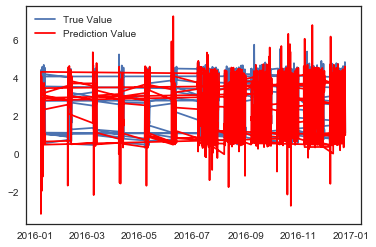

In [450]:
# plot prediction & expected
predictions = pd.Series(predictions)
predictions.index = test.index
plt.plot(test, label="True Value")
plt.plot(predictions, color='red',label="Prediction Value")
plt.legend()
plt.show()

In [451]:
residualTest = pd.Series(resid)
residualTest.index = test.index

count    4177.000000
mean        0.220465
std         0.343726
min        -3.554357
25%         0.149056
50%         0.220104
75%         0.296770
max         4.010301
dtype: float64

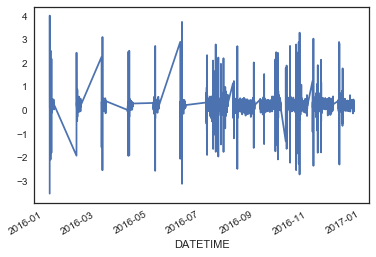

In [452]:
residualTest.plot()
residualTest.describe()

Let's try to do anomaly detection using ARMA model on L_T1 alone

In [453]:
print("threshold:", threshold)
anomaly_detection = pd.DataFrame()
anomaly_detection['L_T1'] = [1 if abs(x) > threshold else 0 for x in residualTest]
anomaly_detection.index = residualTest.index
anomaly_detection.sort_index(inplace=True)
anomaly_detection['L_T1'].value_counts()

threshold: 2.1684100789372294


0    4140
1      37
Name: L_T1, dtype: int64

Let's try to calculate the confusion matrix

In [625]:
def evaluate_anomaly_detection(test_data, anomaly_detection, sensors):
    conditions = False
    for sensor in sensors:
        conditions = conditions|(anomaly_detection[sensor] == 1)
    tp = sum(test_data[conditions]['ATT_FLAG'] == 1)
    fp = sum(test_data[conditions]['ATT_FLAG'] != 1)
    tn = sum(test_data['ATT_FLAG'] != 1) - fp
    fn = sum(test_data['ATT_FLAG'] == 1) - tp
    print("[TP FP TN FN]:",tp,fp,tn,fn)
    
    if (tp+fp == 0): 
        print('precision:',0)
    else:
        print('precision:',1.0 * tp/(tp+fp))
        
    if (tp+fn == 0):
        print("recall:", 0)
    else:
        print('recall:' ,1.0 * tp/(tp+fn))



In [534]:
evaluate_anomaly_detection(test_data, anomaly_detection, ['L_T1'])

201 3675 283 18
precision: 0.05185758513931889
recall: 0.9178082191780822


Okay, the SCM is 0.5 which means it is a naive anomaly detection system that assumes the system is always safe. Let's try to incorporate other sensors

In [457]:
models = {}
# tuning parameters for each sensor
for sensor in sensors:
    print(sensor)
    stepwise_model = auto_arima(data[sensor], start_p=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,
                           d=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    print(stepwise_model)
    models[sensor] = stepwise_model

L_T1
Fit ARIMA: order=(1, 0, 1); AIC=-7752.456, BIC=-7724.143, Fit time=3.181 seconds
Fit ARIMA: order=(0, 0, 0); AIC=28103.160, BIC=28117.316, Fit time=0.018 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-558.100, BIC=-536.866, Fit time=0.086 seconds
Fit ARIMA: order=(0, 0, 1); AIC=16531.825, BIC=16553.059, Fit time=1.012 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-13266.336, BIC=-13230.946, Fit time=9.358 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-13038.324, BIC=-13010.011, Fit time=1.833 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-13286.692, BIC=-13244.224, Fit time=5.482 seconds
Fit ARIMA: order=(3, 0, 3); AIC=-13411.243, BIC=-13354.618, Fit time=9.106 seconds
Fit ARIMA: order=(2, 0, 3); AIC=-13301.274, BIC=-13251.727, Fit time=6.943 seconds
Fit ARIMA: order=(3, 0, 2); AIC=-13412.405, BIC=-13362.859, Fit time=11.360 seconds
Fit ARIMA: order=(3, 0, 1); AIC=-13277.969, BIC=-13235.500, Fit time=5.727 seconds
Total fit time: 54.142 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=

Fit ARIMA: order=(2, 0, 2); AIC=50995.199, BIC=51037.667, Fit time=5.681 seconds
Fit ARIMA: order=(3, 0, 3); AIC=50966.693, BIC=51023.318, Fit time=8.977 seconds
Fit ARIMA: order=(2, 0, 3); AIC=50970.595, BIC=51020.142, Fit time=6.944 seconds
Fit ARIMA: order=(3, 0, 2); AIC=50938.084, BIC=50987.630, Fit time=35.414 seconds
Fit ARIMA: order=(3, 0, 1); AIC=50996.353, BIC=51038.821, Fit time=5.570 seconds
Total fit time: 70.194 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU2
Fit ARIMA: order=(1, 0, 1); AIC=75956.451, BIC=75984.763, Fit time=2.051 seconds
Fit ARIMA: order=(0, 0, 0); AIC=90456.822, BIC=90470.978, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0); AIC=75975.197, BIC=75996.431, Fit time=0.138 seconds
Fit ARIMA: order=(0, 0, 1); AIC=83265.488, BIC=83286.722, Fit time=0.35

/usr/local/lib/python3.6/site-packages/pyramid/arima/auto.py:381: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


Fit ARIMA: order=(1, 0, 1); AIC=69437.370, BIC=69465.682, Fit time=2.137 seconds
Fit ARIMA: order=(0, 0, 0); AIC=74553.248, BIC=74567.404, Fit time=0.009 seconds
Fit ARIMA: order=(1, 0, 0); AIC=69654.180, BIC=69675.414, Fit time=0.067 seconds
Fit ARIMA: order=(0, 0, 1); AIC=70749.393, BIC=70770.627, Fit time=0.710 seconds
Fit ARIMA: order=(2, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2); AIC=70227.009, BIC=70262.399, Fit time=4.709 seconds
Fit ARIMA: order=(2, 0, 2); AIC=64856.049, BIC=64898.518, Fit time=22.216 seconds
Fit ARIMA: order=(3, 0, 2); AIC=64425.456, BIC=64475.002, Fit time=27.536 seconds
Fit ARIMA: order=(3, 0, 1); AIC=65975.237, BIC=66017.706, Fit time=5.136 seconds
Fit ARIMA: order=(3, 0, 3); AIC=64336.776, BIC=64393.400, Fit time=22.590 seconds
Fit ARIMA: order=(2, 0, 3); AIC=64338.395, BIC=64387.942, Fit time=22.104 seconds
Total fit time: 108.957 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 3),
   out_of_sample

/usr/local/lib/python3.6/site-packages/pyramid/arima/auto.py:381: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


Fit ARIMA: order=(1, 0, 1); AIC=28617.006, BIC=28645.318, Fit time=1.981 seconds
Fit ARIMA: order=(0, 0, 0); AIC=32734.367, BIC=32748.523, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0); AIC=29395.433, BIC=29416.667, Fit time=0.056 seconds
Fit ARIMA: order=(0, 0, 1); AIC=28940.484, BIC=28961.718, Fit time=0.102 seconds
Fit ARIMA: order=(2, 0, 1); AIC=28591.182, BIC=28626.573, Fit time=2.082 seconds
Fit ARIMA: order=(2, 0, 0); AIC=28683.131, BIC=28711.443, Fit time=0.067 seconds
Fit ARIMA: order=(2, 0, 2); AIC=28587.850, BIC=28630.318, Fit time=2.631 seconds
Fit ARIMA: order=(3, 0, 3); AIC=28591.811, BIC=28648.436, Fit time=5.261 seconds
Fit ARIMA: order=(1, 0, 2); AIC=28585.855, BIC=28621.245, Fit time=2.343 seconds
Fit ARIMA: order=(1, 0, 3); AIC=28587.355, BIC=28629.824, Fit time=9.427 seconds
Fit ARIMA: order=(2, 0, 3); AIC=28589.807, BIC=28639.354, Fit time=5.122 seconds
Fit ARIMA: order=(0, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 29.089 seconds
ARIMA(callb

/usr/local/lib/python3.6/site-packages/pyramid/arima/auto.py:381: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


Fit ARIMA: order=(1, 0, 1); AIC=67212.376, BIC=67240.688, Fit time=1.887 seconds
Fit ARIMA: order=(0, 0, 0); AIC=68524.009, BIC=68538.165, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=67668.452, BIC=67689.686, Fit time=0.072 seconds
Fit ARIMA: order=(0, 0, 1); AIC=67223.328, BIC=67244.562, Fit time=0.062 seconds
Fit ARIMA: order=(2, 0, 1); AIC=66955.978, BIC=66991.369, Fit time=4.617 seconds
Fit ARIMA: order=(2, 0, 0); AIC=66981.929, BIC=67010.241, Fit time=0.117 seconds
Fit ARIMA: order=(2, 0, 2); AIC=66700.733, BIC=66743.202, Fit time=6.236 seconds
Fit ARIMA: order=(3, 0, 3); AIC=66651.261, BIC=66707.886, Fit time=8.859 seconds
Fit ARIMA: order=(2, 0, 3); AIC=66672.135, BIC=66721.682, Fit time=6.651 seconds
Fit ARIMA: order=(3, 0, 2); AIC=66679.258, BIC=66728.805, Fit time=5.969 seconds
Total fit time: 34.483 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver=

Fit ARIMA: order=(2, 0, 3); AIC=32970.037, BIC=33019.584, Fit time=3.654 seconds
Total fit time: 95.919 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
P_J415
Fit ARIMA: order=(1, 0, 1); AIC=59847.770, BIC=59876.082, Fit time=11.457 seconds
Fit ARIMA: order=(0, 0, 0); AIC=60177.631, BIC=60191.787, Fit time=0.008 seconds
Fit ARIMA: order=(1, 0, 0); AIC=60150.872, BIC=60172.107, Fit time=0.048 seconds
Fit ARIMA: order=(0, 0, 1); AIC=60119.109, BIC=60140.343, Fit time=0.073 seconds
Fit ARIMA: order=(2, 0, 1); AIC=59471.371, BIC=59506.761, Fit time=2.490 seconds
Fit ARIMA: order=(2, 0, 0); AIC=59479.661, BIC=59507.973, Fit time=0.102 seconds
Fit ARIMA: order=(2, 0, 2); AIC=59404.972, BIC=59447.440, Fit time=5.151 seconds
Fit ARIMA: order=(3, 0, 3); AIC=59261.849, BIC=59318.474, Fit time=9.9

In [462]:
def calculate_residuals_test_set(test_data, sensor, model_fit, verbose=False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # save model coefficients
        ar_coef, ma_coef = model_fit.arparams, model_fit.maparams

        predictions = list()
        start = max(arma_order)
        resid = [0] * start
        predictions = [0] * start
        for t in range(start,len(test_data[sensor])):
            if verbose: 
                print("t=",t)
            history = test_data['L_T1'][:t]
            yhat = arma_predict(ar_coef, history) + arma_predict(ma_coef, resid)
            predictions.append(yhat)
            expected = test_data['L_T1'][t]
            resid.append(expected - yhat)
            if verbose:
                print('>predicted=%.3f, expected=%.3f' % (yhat, expected))
        rmse = np.sqrt(mean_squared_error(test, predictions))
        print('Test RMSE: %.3f' % rmse)
        
        residualTest = pd.Series(resid)
        residualTest.index = test.index
        return residualTest

In [628]:
# fit model and save thresholds
thresholds = {}
residualsTrainDataFrame = pd.DataFrame()
residualsTestDataFrame = pd.DataFrame()
anomalyDetection = pd.DataFrame()
for sensor in sensors:
    print("Building model for",sensor)
    arma_order = (models[sensor].order[0], models[sensor].order[2])
    if arma_order == (0,0): 
        continue #skip
    #build model
    model_fit = ARMA(data[sensor], order=arma_order).fit()
    #store residuals
    residualsTraining = model_fit.resid
    residualsTrainDataFrame[sensor] = residualsTraining
    # set threshold to two times of standard deviation of residuals
    # thresholds[sensor] = 2 * np.std(residualsTraining)
    thresholds[sensor] = adjust_threshold(residualsTraining,95)
    print("Threshold:",thresholds[sensor])
    residualTest = calculate_residuals_test_set(test_data, sensor, model_fit)
    residualsTestDataFrame[sensor] = residualTest
    anomaly_detection[sensor] = [1 if abs(x) > thresholds[sensor] else 0 for x in residualTest]
    anomaly_detection.index = residualTest.index
    anomaly_detection.sort_index(inplace=True)
    evaluate_anomaly_detection(test_data, anomaly_detection, [sensor])
    
evaluate_anomaly_detection(test_data, anomaly_detection, [sensor for sensor in anomaly_detection.keys()])
    
    

Building model for L_T1
Threshold: 0.2300687813787674
Test RMSE: 1.647
[TP FP TN FN]: 103 1925 2033 116
precision: 0.050788954635108484
recall: 0.4703196347031963
Building model for L_T2
Threshold: 0.48207185490590243
Test RMSE: 1.632
[TP FP TN FN]: 46 970 2988 173
precision: 0.045275590551181105
recall: 0.2100456621004566
Building model for L_T3
Threshold: 0.305256145159297
Test RMSE: 1.787
[TP FP TN FN]: 209 3782 176 10
precision: 0.052367827612127285
recall: 0.954337899543379
Building model for L_T4
Threshold: 0.7314566479459136
Test RMSE: 1.725
[TP FP TN FN]: 152 2798 1160 67
precision: 0.05152542372881356
recall: 0.6940639269406392
Building model for L_T5
Threshold: 0.43925182400931084
Test RMSE: 3.181
[TP FP TN FN]: 219 3954 4 0
precision: 0.052480230050323505
recall: 1.0
Building model for L_T6
Threshold: 0.25039881475346765
Test RMSE: 3.386
[TP FP TN FN]: 219 3955 3 0
precision: 0.05246765692381409
recall: 1.0
Building model for L_T7
Threshold: 1.009465213162605
Test RMSE: 1.92

In [622]:
evaluate_anomaly_detection(test_data, anomaly_detection, ['L_T1','L_T2','L_T3','L_T7'])

219 3942 16 0
precision: 0.05263157894736842
recall: 1.0
